Data found at following link: https://www.cdc.gov/mmwr/volumes/65/wr/mm6533a4.htm#T3_down

Import data from CDC, had to copy and paste into excel so there were some issues

Cleaned headers in Excel. Also removed "Regional", "Total", and redundant territory rows. US territories are included although they might skew the results. See below.

In [1]:
import pandas as pd

#CDC_Vaccine_Data=pd.read_csv('C:\\Users\\Monica\\Desktop\\Biomedical Informatics\\Stats and Probability\\BMI_6106\\final project raw vaccine data.csv', encoding= 'unicode_escape', header=None)
df = pd.read_csv('vax_data.csv')
df.head()

,HHS Region/State/Territory,gte1_Tdap_pct,gte1_MenACWY,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m
0,Connecticut,93.7 (±3.0),93.5 (±3.1),70.9 (±8.2),64.3 (±8.7),55.2 (±9.1),65.3 (±7.8)***,58.2 (±8.1)***,42.0 (±8.3)***
1,Maine,87.7 (±4.0),77.7 (±5.3),66.0 (±8.3),53.9 (±8.7),44.1 (±8.6),65.8 (±7.9)***,58.7 (±8.3)***,46.7 (±8.4)***
2,Massachusetts,91.2 (±4.1),89.5 (±4.4),73.5 (±8.6),63.0 (±9.5),52.8 (±9.7),63.0 (±8.8),50.9 (±9.1),35.2 (±8.5)
3,New Hampshire,92.4 (±3.9),87.7 (±4.4),74.2 (±8.8),59.7 (±10.0),51.4 (±10.0),69.8 (±7.9)***,55.1 (±9.0),47.1 (±9.1)***
4,Rhode Island,97.1 (±1.6)***,97.7 (±1.5),87.9 (±4.9)***,77.9 (±6.7),68.0 (±7.4)***,80.6 (±5.8)***,66.6 (±7.1),58.1 (±7.4)***


Clean up the data

In [2]:
import re
import numpy as np

# iterate through the columns
for col in df.columns[1:]:
    error = []
    values = []
    for v in df[col]:
        # Split using regex
        sp = re.split('\(|\)', str(v))
        if len(sp) < 2:
            # know where values are missing
            error.append(np.nan)
            values.append(np.nan)
        else:
            try:
                # make sure we have numbers and not strings
                values.append(float(sp[0]))
                error.append(float(sp[1][1:]))
            except ValueError:
                # hacky code to correct instances of '23. 4' for example
                values.append(float(sp[0].replace(' ', '')))
                error.append(float(sp[1][1:].replace(' ','')))
    # replace original column with cleaned, numerical column
    df[col] = values
    # now have a new column representing the 95% CI
    err_col = col + '_err'
    df[err_col] = error
df.head()

,HHS Region/State/Territory,gte1_Tdap_pct,gte1_MenACWY,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_Tdap_pct_err,gte1_MenACWY_err,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err
0,Connecticut,93.7,93.5,70.9,64.3,55.2,65.3,58.2,42.0,3.0,3.1,8.2,8.7,9.1,7.8,8.1,8.3
1,Maine,87.7,77.7,66.0,53.9,44.1,65.8,58.7,46.7,4.0,5.3,8.3,8.7,8.6,7.9,8.3,8.4
2,Massachusetts,91.2,89.5,73.5,63.0,52.8,63.0,50.9,35.2,4.1,4.4,8.6,9.5,9.7,8.8,9.1,8.5
3,New Hampshire,92.4,87.7,74.2,59.7,51.4,69.8,55.1,47.1,3.9,4.4,8.8,10.0,10.0,7.9,9.0,9.1
4,Rhode Island,97.1,97.7,87.9,77.9,68.0,80.6,66.6,58.1,1.6,1.5,4.9,6.7,7.4,5.8,7.1,7.4


In [3]:
df.index = df.iloc[:,0]
# Standardize index names
df.index = [i.split('(')[0].strip()  for i in df.index]
# keep the columns we care about
hpv = df.iloc[:,3:9]
hpv.head()

,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m
Connecticut,70.9,64.3,55.2,65.3,58.2,42.0
Maine,66.0,53.9,44.1,65.8,58.7,46.7
Massachusetts,73.5,63.0,52.8,63.0,50.9,35.2
New Hampshire,74.2,59.7,51.4,69.8,55.1,47.1
Rhode Island,87.9,77.9,68.0,80.6,66.6,58.1


As preliminary exploration, I will plot a singular value decomposition to get a feel for the data

In [4]:
# Library for visualizing SVD
import svdawg as sv
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 30, 20

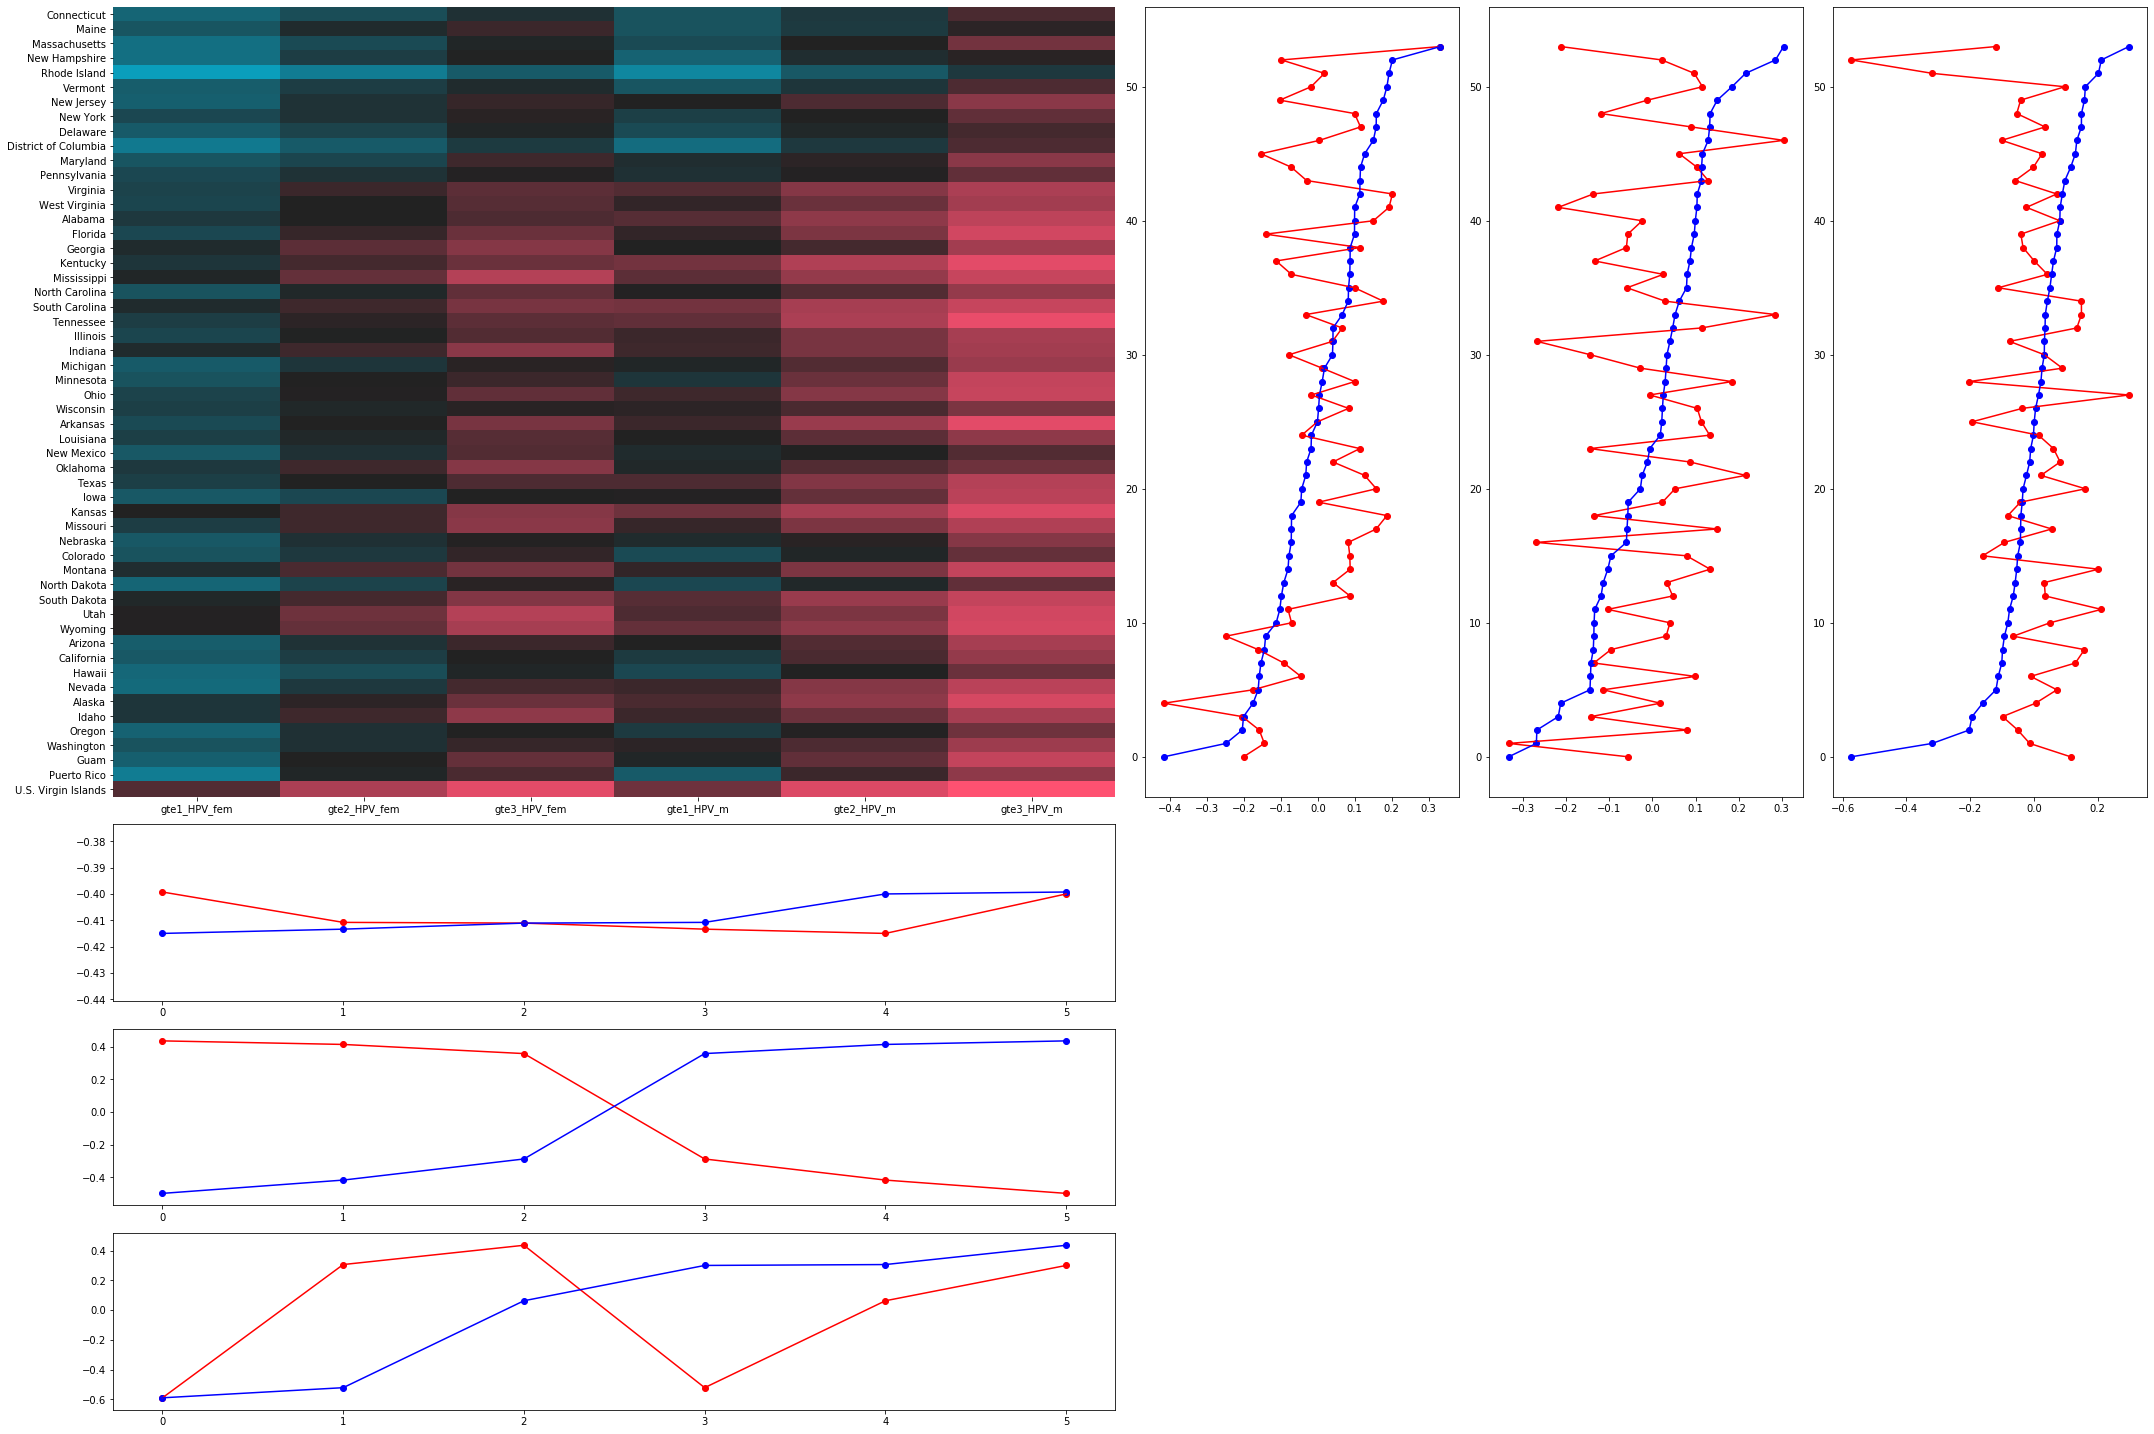

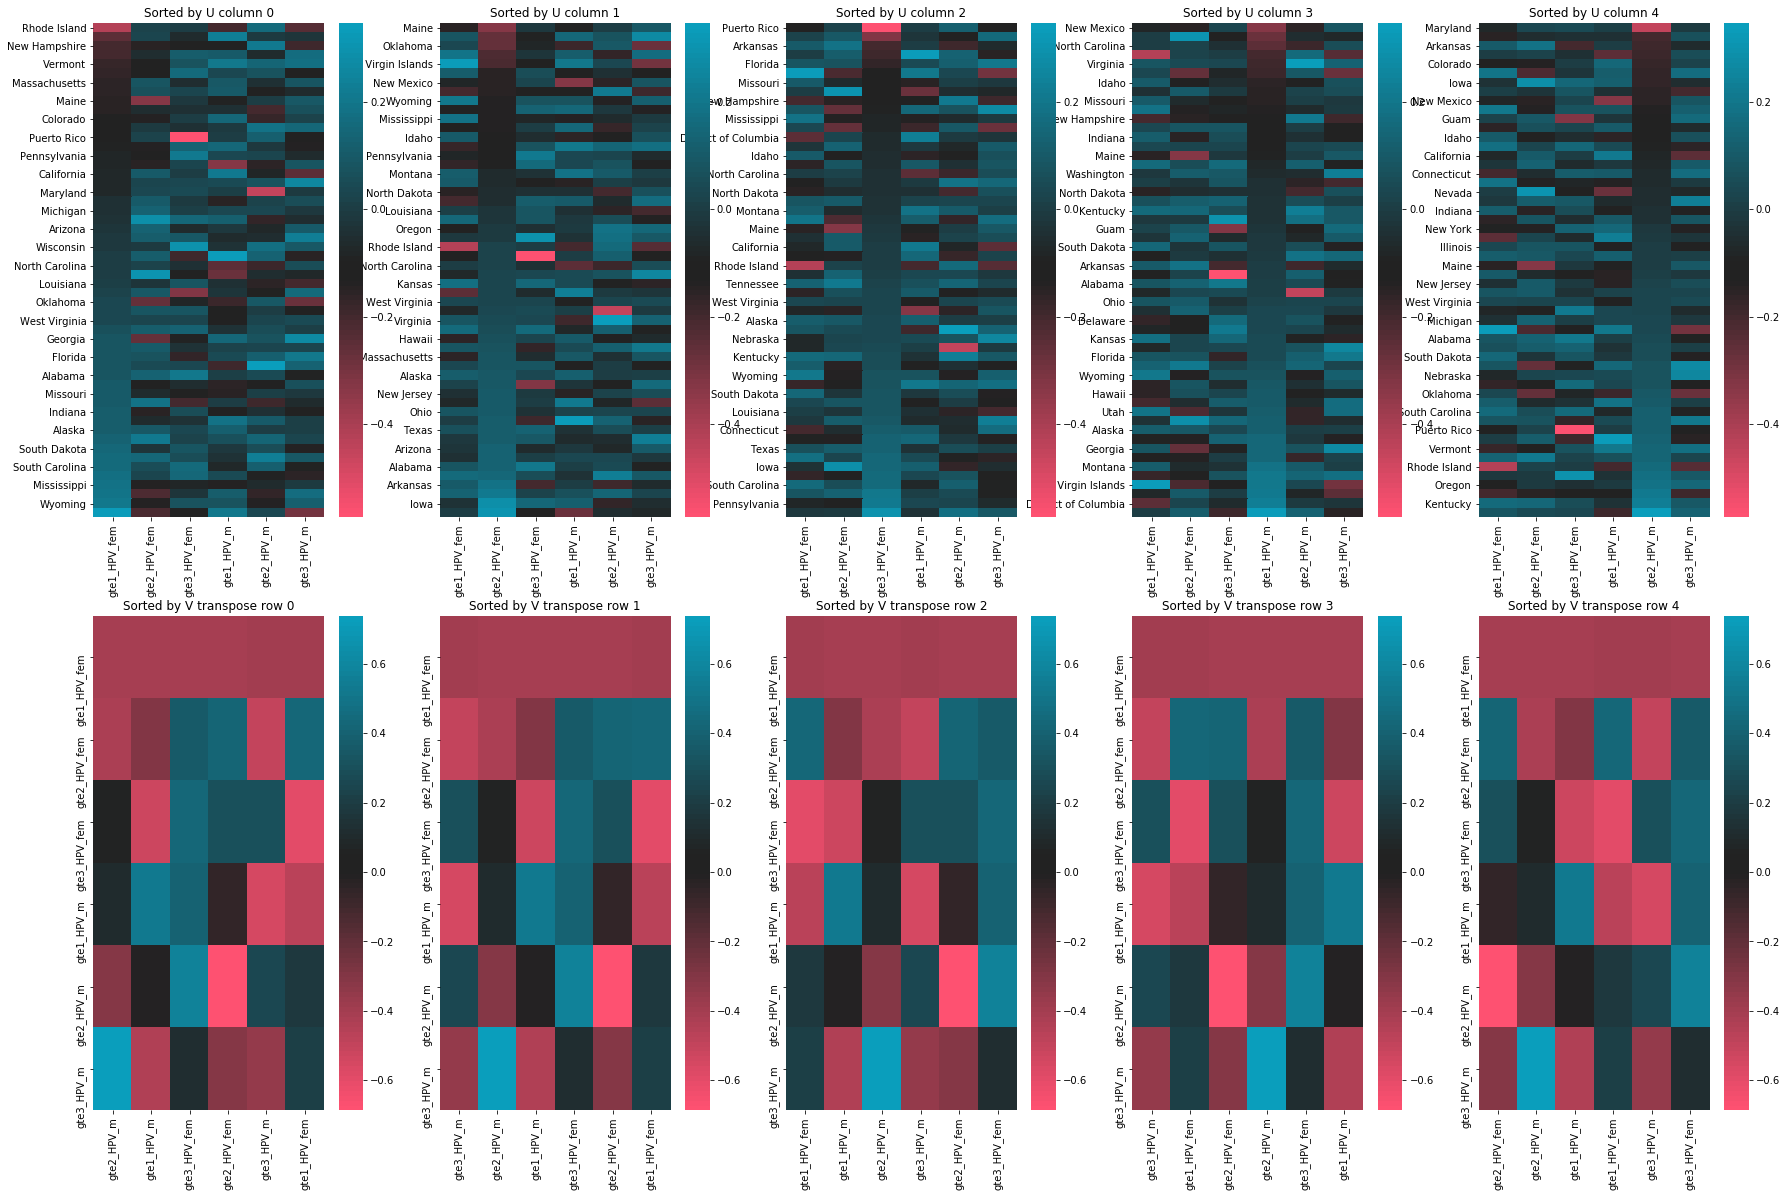

In [5]:
# Visualize SVD of vax data
svd = sv.pd_svd(hpv)
sv.svd_overview(hpv)
sv.plot_svs(svd)

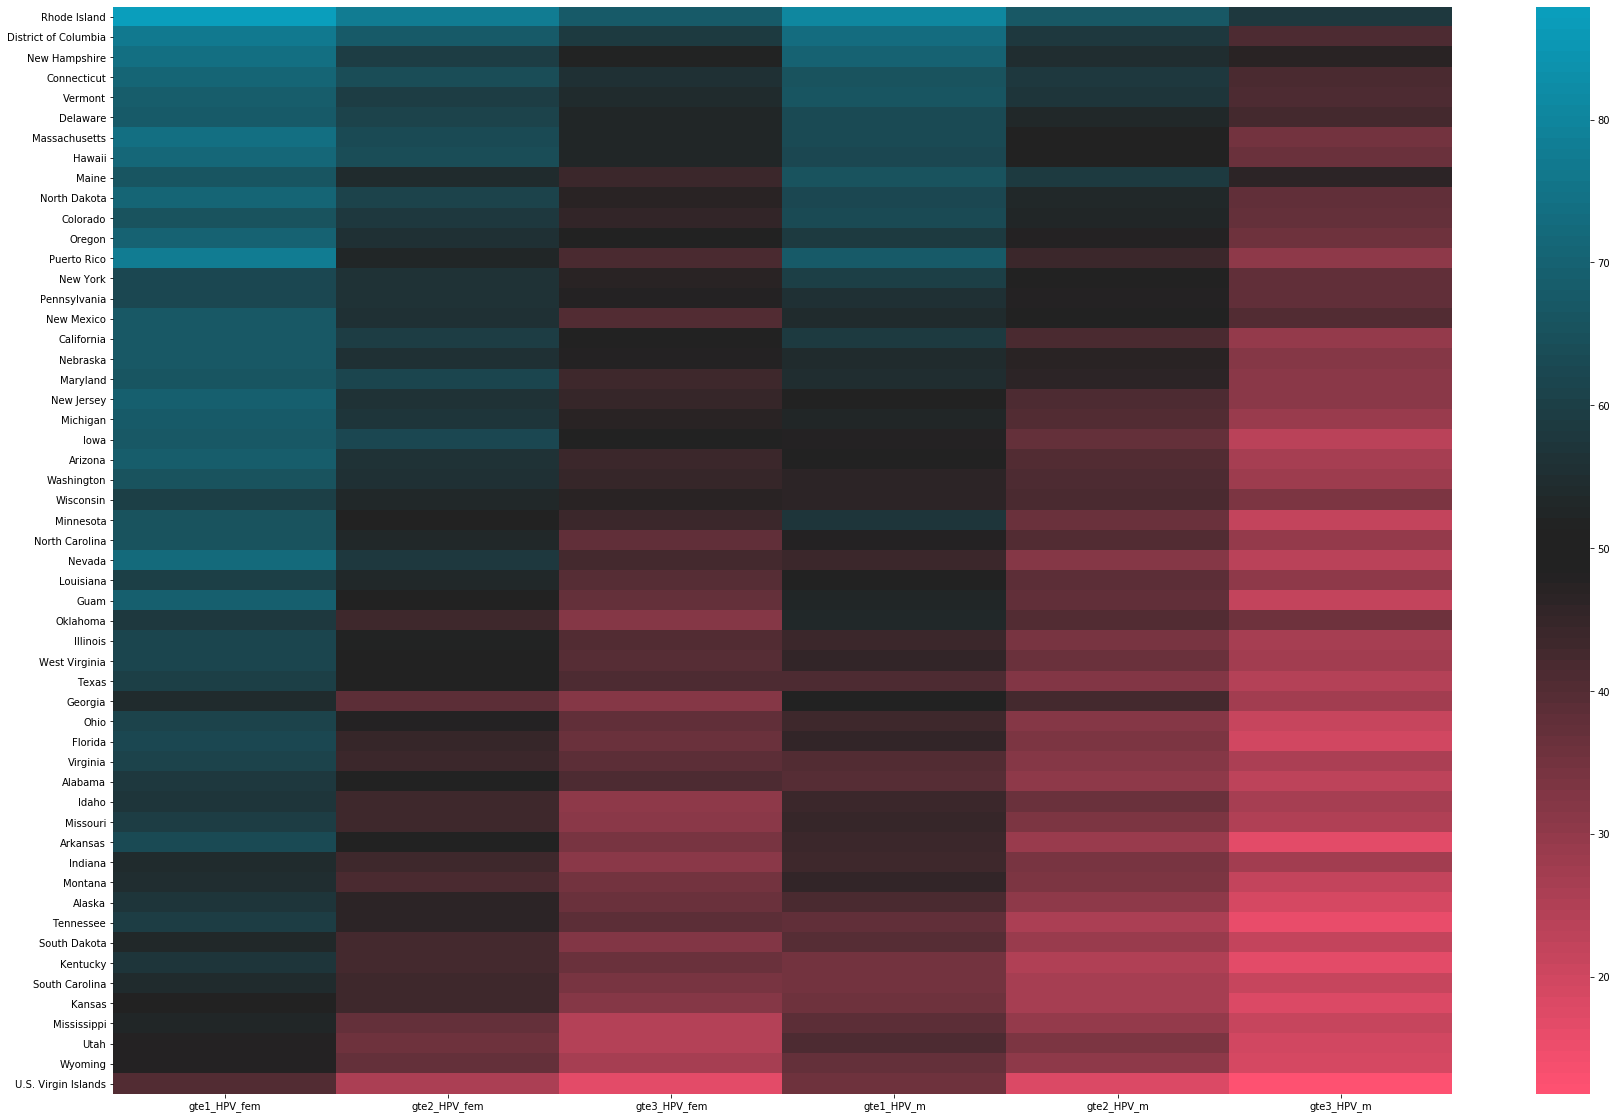

In [6]:
# Sort by top singular value in U
nidx = svd[0].sort_values(by=svd[0].columns[0]).index
sorthpv = hpv.loc[nidx,:]
sv.plot_mat((sorthpv))

From the above plot, we have clustered states with seemingly effective vaccination programs towards the top and less effective towards the bottom. 


We can also examine the scalar matrix of the SVD to see how important our singular values are

In [42]:
svd[1]

,0
0,16.746102
1,5.200311
2,2.979965
3,2.027025
4,1.502929
5,1.130061


From this, we see that most of the variance is indeed explained by the first singular value, so we will use that as a form of dimensionality reduction.

##### Examine relationship between HPV vaccinations and educational outcomes by state.

Download Excel from https://nces.ed.gov/programs/digest/d19/tables/dt19_203.40.asp?current=yes. This gives total enrollment information that can be used to normalize spending across states on a per pupil basis.

In [7]:
# Get total enrollment across states and territories after a little data cleaning
enrollment = pd.read_csv('enrollment.csv', header=None)
enrollment.head()

,0,1
0,Alabama .......................,742444
1,Alaska .........................,132872
2,Arizona ......................,1110851
3,Arkansas ........................,496085
4,California ......................,6304266


In [8]:
# standardize names
enrollment[0] = [i.strip().split('..')[0].strip() for i in enrollment[0]]
# encode as dictionary for quick access
e_dict = dict(zip(enrollment[0], enrollment[1]))

Now we can normalize educational spending on a per student basis. 

Let's look at total expenditures for public elementary and secondary education by state. Source: https://nces.ed.gov/programs/digest/d19/tables/dt19_236.30.asp?current=yes

In [35]:
expenditures = pd.read_csv('expenditures.csv', header=None, index_col=0)
expenditures.index = [i.strip().split('..')[0].strip() for i in expenditures.index]
expenditures.iloc[:,0] = [int(str(i).replace(',','')) for i in expenditures.iloc[:,0]]
expenditures['enrollment'] = [int(str(i).replace(',','')) for i in enrollment.iloc[:,1]]
expenditures['CostPerStudent'] = expenditures.iloc[:,0] / expenditures.iloc[:,1]
expenditures.columns = ['expenditures', 'enrollment', 'CostPerStudent']

In [41]:
expenditures.sort_values(by='CostPerStudent').head()

,expenditures,enrollment,CostPerStudent
Puerto Rico,2891749,346096,8.355338
Idaho,2560406,301186,8.501079
Utah,5813157,668274,8.698763
Oklahoma,6228822,695092,8.961148
Arizona,10530826,1110851,9.479963


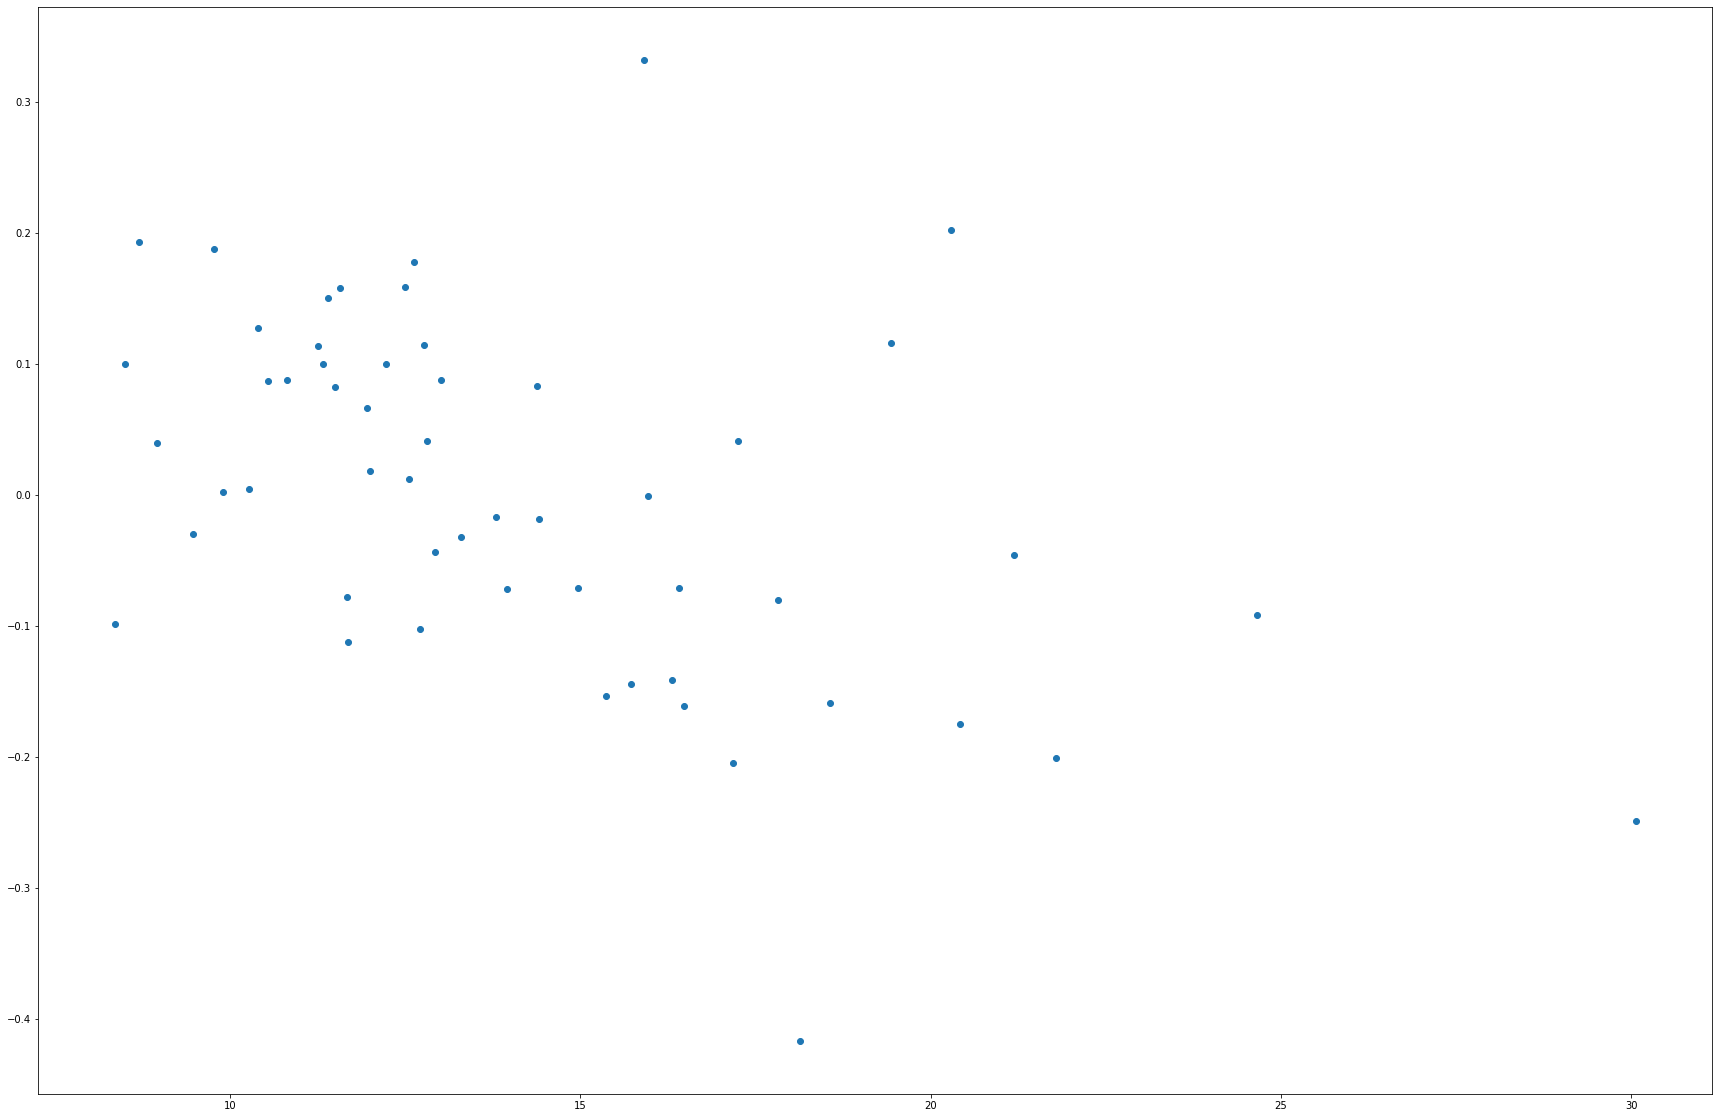

In [40]:
# using the first singular value
fem_cps = svd[0]
fem_cps.sort_index(inplace=True)
expenditures.sort_index(inplace=True)
fem_cps['CostPerStudent'] = expenditures.CostPerStudent
plt.scatter(fem_cps.CostPerStudent, fem_cps.gte1_HPV_fem)

We see some correllation, but further analysis is likely easier in R.